<a href="https://colab.research.google.com/github/tabaraei/Kernelized-Linear-Classification/blob/main/Kernelized_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data Loading and Exploration

## Loading the dataset and libraries

Directly from the dataset link provided in the Google Drive, we attempt to load the data as below:

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dataset_url = 'https://drive.google.com/uc?export=download&id=1HeP6uwyG3oMcJnViG4yCMmzmSeTa1mko'
dataset = pd.read_csv(dataset_url)
dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.481134,-0.572225,99.274788,-0.868047,-0.663229,0.572447,5.163238,1.765743,0.720265,-54.952233,-1
9996,0.047373,0.990198,100.444834,-0.707179,0.912113,-0.510397,1.128577,0.116130,-2.559018,-56.008656,-1
9997,1.741933,0.036304,100.524071,-0.113742,-0.761337,-0.728295,-1.334732,-1.312760,-0.442573,-56.170876,-1
9998,2.574986,0.041442,98.983735,-1.937883,0.983004,0.798133,5.847342,0.904038,-1.695064,-54.820699,1


Analyzing the status of the dataset below, it is clear that:

- The target labels `y` are binary, taking values from the set {-1, 1}. These labels are of data type int64, which aligns well with our classification objectives.
- The feature vector `X` consists exclusively of numerical values, eliminating the need for converting categorical features to numerical ones. All features are of data type float64, so no data type conversion is necessary.

Overall, our dataset contains 10 features $x_1, ..., x_{10}$, and 10000 data samples across the rows. No missing values can be observed, since all the features contain 10000 samples as well.

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
 4   x5      10000 non-null  float64
 5   x6      10000 non-null  float64
 6   x7      10000 non-null  float64
 7   x8      10000 non-null  float64
 8   x9      10000 non-null  float64
 9   x10     10000 non-null  float64
 10  y       10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


## Data Distribution

Analyzing the distribution of target labels `y` as below, it is clear that the dataset is almost perfectly *balanced*, with roughly same number of positive and negative classes distributed among the samples of the dataset.

In [28]:
dataset['y'].value_counts().to_frame()

,count
y,
-1,5008
1,4992


Analyzing the distribution of features $x_i \in X$ as below, it can be seen that the range of values each feature takes is different than the other. Therefore, we should adopt proper scaling methods in our preprocessing step to avoid our prediction being more affected toward features with higher range of values.

In [29]:
dataset.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.591298,0.515879,99.848936,-1.504139,0.077645,0.051823,0.975207,0.635194,0.051926,-55.447678,-0.001600
std,1.321185,2.054488,0.710948,1.133605,0.707270,0.704755,2.162237,2.212708,1.769646,0.710082,1.000049
min,0.002443,-7.524934,98.572455,-7.078939,-1.000000,-1.000000,-6.906971,-7.140755,-7.151890,-56.773931,-1.000000
25%,0.524758,-0.883862,99.159314,-2.179713,-0.624710,-0.644261,-0.500506,-0.879985,-1.129665,-56.137679,-1.000000
50%,1.276243,0.492813,99.802830,-1.262985,0.157145,0.101648,1.006918,0.624762,0.024726,-55.397208,-1.000000
75%,2.352106,1.902003,100.549141,-0.605316,0.777856,0.754770,2.434886,2.098389,1.248961,-54.758351,1.000000
max,9.384223,8.302375,101.260768,-0.000003,1.000000,1.000000,8.760306,9.287266,6.211452,-54.208890,1.000000


Additionally, we can analyze the potential existence of noise and outliers. While there several techniques to detect outliers like *z-score*, we first take a look at the corresponding *boxplot* of each feature, and then use the *IQR (Inter Quartile Range)* approach to determine the outlier boundaries and remove them, since it is the most commonly used and most reliable approach in the research field.

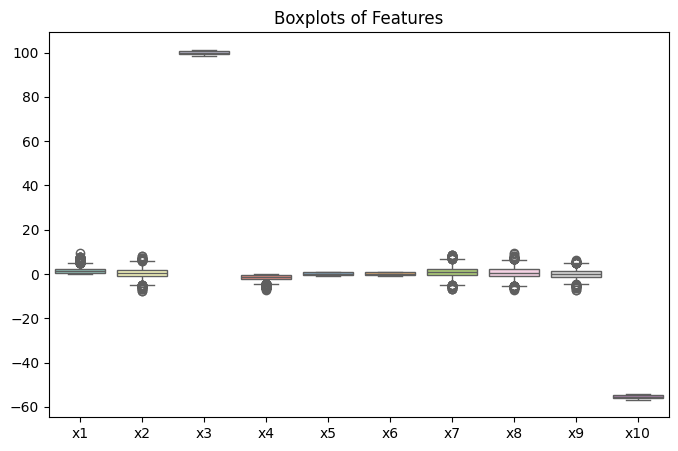

In [30]:
plt.figure(figsize=(8, 5))
plt.title("Boxplots of Features")
_ = sns.boxplot(data=dataset.drop(columns=['y']), palette='Set3', showfliers=True)

In [31]:
# Compute Q1 and Q3 percentiles, and the corresponding IQR
Q1 = dataset.drop(columns=['y']).quantile(0.25)
Q3 = dataset.drop(columns=['y']).quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Detecting the outliers, and removing them from dataset
outliers = (dataset.drop(columns=['y']) < lower) | (dataset.drop(columns=['y']) > upper)
dataset = dataset[~outliers.any(axis=1)]
dataset.shape

(9456, 11)

Looking at the boxplot of the features again, it is clear that the majority of outliers have been polished using the IQR technique, and we can continue to the next step.

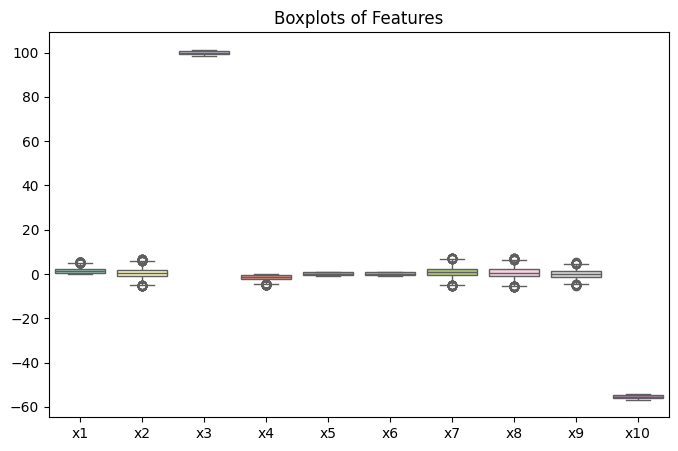

In [39]:
plt.figure(figsize=(8, 5))
plt.title("Boxplots of Features")
_ = sns.boxplot(data=dataset.drop(columns=['y']), palette='Set3', showfliers=True)

# 2- Data Preprocessing

In this section, the main focus is to preprocess the data properly, such that by end of the exploration and analysis performed on the dataset, it is ready to be fed into machine learning algorithms and no longer error-prone. Throught this process, we will analyze the following criteria:

1. **Presence of Null Values:** The dataset is checked to see if any Null values exist. The null values can complicated the numerical computations on the data, and they should be taken care using techniques such as impute them or remove the affected rows/columns.

2. **Check for Duplicates:** If a sample with exact same characteristic is duplicated, it is preferable to keep only a single one of them, and avoid duplication.

3. **Feature Selection:** Selecting the most informative features is undeniably one of the most important tasks before feeding the data into machine learning models. In this particular dataset, since we do not have prior knowledge about the information provided by features, we will only rely on identification of correlation among features.



Normalize/standardize features if necessary.
Split the dataset into training and test sets.
Avoid data leakage by ensuring the test set remains untouched during preprocessing of the training data.


Step-by-Step Data Preprocessing

- Explore the Dataset: 1) Check for missing values. 2) Understand the distribution of features.3) Identify any outliers or anomalies.

- Handle Missing Values: If there are missing values, decide whether to impute them or remove the affected rows/columns.

- Normalize/Standardize Features: Standardize the features to have a mean of 0 and a standard deviation of 1. This is especially important for algorithms like SVM.

- Split the Dataset: Split the dataset into training and test sets, ensuring there is no data leakage.

- Convert Labels: Ensure the labels (y) are in a format suitable for the algorithms, typically as integers (e.g., -1 and 1).

## 2-1- Presence of Null Values

In order to analyze the existence of Null values, we will count the occurrences of such values using `isnull` function in each column, reporting the result as below.

In [ ]:
dataset.isnull().sum().to_frame(name='Sum of Null Values').T

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
Sum of Null Values,0,0,0,0,0,0,0,0,0,0,0


As we mentioned earlier in the previous section, there is no Null values present in our dataset, hence no further consideration is required in this regard.

## 2-2- Check for Duplicates

Using the `duplicated` function provided by Pandas, we can count the duplicated rows as below:

In [ ]:
dataset.duplicated().sum()

0

Since there are no duplicated rows present in our dataset, no actions are expected in this manner.

## 2-3- Feature Selection

It is evident that many of the machine learning applications rely on the fact the features are **independent** from each other, hence they are not correlated with one another. Highly correlated features can sometimes provide redundant information, where we might consider dimensionality reduction techniques or feature selection methods in such cases.

The identification of the correlation among features is an important task, which can be achieved by using the *correlation matrix* to assess the correlation among different features and identify potentially irrelevant information. A correlation matrix provides the correlation coefficients between pairs of features, which helps to understand the relationships between them. After computing this matrix, we attempt to visualize it using a *heatmap* to better analyze the situation.

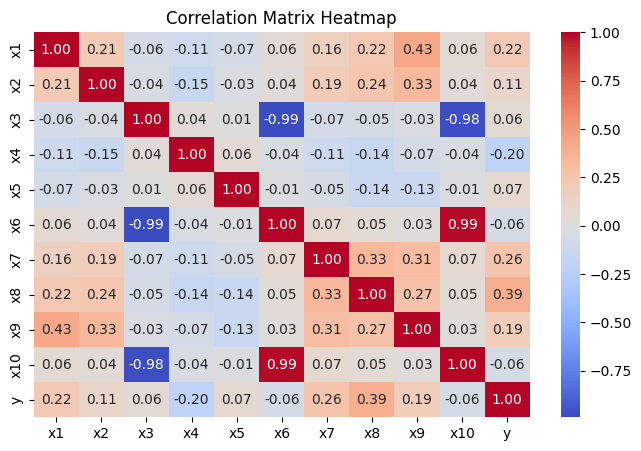

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Correlation Matrix Heatmap")
_ = sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Interpreting the correlation matrix:
- The "red" cells with values close to 1 denote perfect positive correlation
- The "blue" cells with values close to -1 denote perfect negative correlation
- The "light" cells with values close to 0 denote no correlation among those features

Analyzing the correlations, it can be seen that the features $x_6$ and $x_{10}$ are positively correlated together (with value 0.99), while being negatively correlated with $x_3$ (with values -0.99 and -0.98). Additionally, analyzing their correlation with respect to the label `y`, it can be seen that all of them are almost with the same value close to 0.06, providing no extra information with respect to the other for the classification.

After identifying highly correlated features, since we have a few number of features available, we will proceed with manually removing redundant features which are highly correlated. To this regard, we remove the features $x_3$ and $x_{10}$, preservng the feature $x_6$ in our dataset.

In [ ]:
dataset.drop(columns=['x3', 'x10'], inplace=True)
dataset.head(3)

,x1,x2,x4,x5,x6,x7,x8,x9,y
0,1.205492,5.823226,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-1
1,1.391530,3.611581,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,1
2,1.692571,-0.887019,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-1


# 3- Model Implementation

Implement and test each algorithm iteratively

# 4- Feature Expansion

Apply polynomial feature expansion and retrain the models

# 5- Kernel Methods

Implement and test the kernelized versions of the algorithms

# 6- Hyperparameter Tuning

Perform hyperparameter tuning using cross-validation